<a href="https://colab.research.google.com/github/Abin1401/Abin1401/blob/main/Wheather_Prediction_In_Austrailia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Model Metrics:
Rainfall Prediction MAE: 1.86
Rainfall Prediction MSE: 34.77
Rainfall Prediction R-squared (R²): 0.46
Temperature Prediction MAE: 0.00
Temperature Prediction MSE: 0.00
Temperature Prediction R-squared (R²): 1.00
Wind Speed Prediction MAE: 0.00
Wind Speed Prediction MSE: 0.00
Wind Speed Prediction R-squared (R²): 1.00

SVR Model Metrics:
Rainfall Prediction MAE: 1.69
Rainfall Prediction MSE: 46.17
Rainfall Prediction R-squared (R²): 0.29
Temperature Prediction MAE: 0.12
Temperature Prediction MSE: 0.11
Temperature Prediction R-squared (R²): 1.00
Wind Speed Prediction MAE: 0.37
Wind Speed Prediction MSE: 2.10
Wind Speed Prediction R-squared (R²): 0.99


Text(0.5, 1.0, 'RF - Actual vs Predicted Temperature')

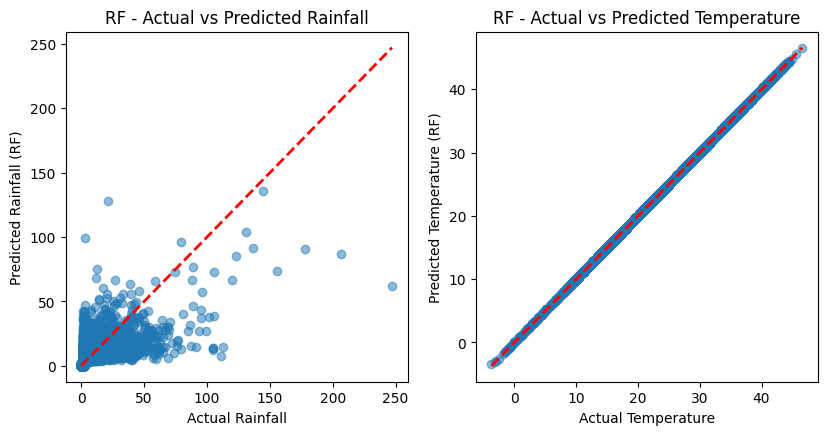

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path =file_path = '/content/Weather Training Data.csv'

weather_data = pd.read_csv(file_path)

# Data Cleaning
# 1. Handle Missing Values
imputer = SimpleImputer(strategy='mean')
weather_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
              'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
              'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']] = imputer.fit_transform(
    weather_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                  'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])

# 2. Encode Categorical Variables
label_encoder = LabelEncoder()
weather_data['Location'] = label_encoder.fit_transform(weather_data['Location'])
weather_data['WindGustDir'] = label_encoder.fit_transform(weather_data['WindGustDir'].fillna('Unknown'))
weather_data['WindDir9am'] = label_encoder.fit_transform(weather_data['WindDir9am'].fillna('Unknown'))
weather_data['WindDir3pm'] = label_encoder.fit_transform(weather_data['WindDir3pm'].fillna('Unknown'))
weather_data['RainToday'] = label_encoder.fit_transform(weather_data['RainToday'].fillna('No'))

# Feature Engineering
# Selecting relevant features
features = weather_data[['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                         'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                         'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                         'Temp9am', 'Temp3pm', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']]

# Standardize Features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Target Variables
target_rainfall = weather_data['Rainfall']
target_temp = weather_data['MaxTemp']
target_wind_speed = weather_data['WindGustSpeed']

# Split the Data into Training and Test Sets
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(features_scaled, target_rainfall, test_size=0.2, random_state=42)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(features_scaled, target_temp, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(features_scaled, target_wind_speed, test_size=0.2, random_state=42)

# Train Random Forest Regressors
rain_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rain_rf_model.fit(X_train_rain, y_train_rain)

temp_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
temp_rf_model.fit(X_train_temp, y_train_temp)

wind_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
wind_rf_model.fit(X_train_wind, y_train_wind)

# Train SVR Models
rain_svr_model = SVR()
rain_svr_model.fit(X_train_rain, y_train_rain)

temp_svr_model = SVR()
temp_svr_model.fit(X_train_temp, y_train_temp)

wind_svr_model = SVR()
wind_svr_model.fit(X_train_wind, y_train_wind)

# Predictions on Test Data
rain_rf_pred = rain_rf_model.predict(X_test_rain)
temp_rf_pred = temp_rf_model.predict(X_test_temp)
wind_rf_pred = wind_rf_model.predict(X_test_wind)

rain_svr_pred = rain_svr_model.predict(X_test_rain)
temp_svr_pred = temp_svr_model.predict(X_test_temp)
wind_svr_pred = wind_svr_model.predict(X_test_wind)

# Evaluation Metrics for Random Forest
rain_rf_mae = mean_absolute_error(y_test_rain, rain_rf_pred)
temp_rf_mae = mean_absolute_error(y_test_temp, temp_rf_pred)
wind_rf_mae = mean_absolute_error(y_test_wind, wind_rf_pred)

rain_rf_mse = mean_squared_error(y_test_rain, rain_rf_pred)
temp_rf_mse = mean_squared_error(y_test_temp, temp_rf_pred)
wind_rf_mse = mean_squared_error(y_test_wind, wind_rf_pred)

rain_rf_r2 = r2_score(y_test_rain, rain_rf_pred)
temp_rf_r2 = r2_score(y_test_temp, temp_rf_pred)
wind_rf_r2 = r2_score(y_test_wind, wind_rf_pred)

# Evaluation Metrics for SVR
rain_svr_mae = mean_absolute_error(y_test_rain, rain_svr_pred)
temp_svr_mae = mean_absolute_error(y_test_temp, temp_svr_pred)
wind_svr_mae = mean_absolute_error(y_test_wind, wind_svr_pred)

rain_svr_mse = mean_squared_error(y_test_rain, rain_svr_pred)
temp_svr_mse = mean_squared_error(y_test_temp, temp_svr_pred)
wind_svr_mse = mean_squared_error(y_test_wind, wind_svr_pred)

rain_svr_r2 = r2_score(y_test_rain, rain_svr_pred)
temp_svr_r2 = r2_score(y_test_temp, temp_svr_pred)
wind_svr_r2 = r2_score(y_test_wind, wind_svr_pred)

# Print Evaluation Metrics
print('Random Forest Model Metrics:')
print(f'Rainfall Prediction MAE: {rain_rf_mae:.2f}')
print(f'Rainfall Prediction MSE: {rain_rf_mse:.2f}')
print(f'Rainfall Prediction R-squared (R²): {rain_rf_r2:.2f}')

print(f'Temperature Prediction MAE: {temp_rf_mae:.2f}')
print(f'Temperature Prediction MSE: {temp_rf_mse:.2f}')
print(f'Temperature Prediction R-squared (R²): {temp_rf_r2:.2f}')

print(f'Wind Speed Prediction MAE: {wind_rf_mae:.2f}')
print(f'Wind Speed Prediction MSE: {wind_rf_mse:.2f}')
print(f'Wind Speed Prediction R-squared (R²): {wind_rf_r2:.2f}')

print('\nSVR Model Metrics:')
print(f'Rainfall Prediction MAE: {rain_svr_mae:.2f}')
print(f'Rainfall Prediction MSE: {rain_svr_mse:.2f}')
print(f'Rainfall Prediction R-squared (R²): {rain_svr_r2:.2f}')

print(f'Temperature Prediction MAE: {temp_svr_mae:.2f}')
print(f'Temperature Prediction MSE: {temp_svr_mse:.2f}')
print(f'Temperature Prediction R-squared (R²): {temp_svr_r2:.2f}')

print(f'Wind Speed Prediction MAE: {wind_svr_mae:.2f}')
print(f'Wind Speed Prediction MSE: {wind_svr_mse:.2f}')
print(f'Wind Speed Prediction R-squared (R²): {wind_svr_r2:.2f}')

# Visualization: Actual vs Predicted Values
plt.figure(figsize=(15, 10))

# Random Forest
plt.subplot(2, 3, 1)
plt.scatter(y_test_rain, rain_rf_pred, alpha=0.5)
plt.plot([y_test_rain.min(), y_test_rain.max()], [y_test_rain.min(), y_test_rain.max()], 'r--', lw=2)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall (RF)')
plt.title('RF - Actual vs Predicted Rainfall')

plt.subplot(2, 3, 2)
plt.scatter(y_test_temp, temp_rf_pred, alpha=0.5)
plt.plot([y_test_temp.min(), y_test_temp.max()], [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature (RF)')
plt.title('RF - Actual vs Predicted Temperature')